#7장 영상 분할

In [ ]:
import cv2
cv2.__version__

'4.10.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

Cloning into 'insightbook.opencv_project_python'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 469 (delta 23), reused 38 (delta 16), pack-reused 389 (from 1)
Receiving objects: 100% (469/469), 30.72 MiB | 21.12 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
%cd /content/insightbook.opencv_project_python/07.segmentation

/content/insightbook.opencv_project_python/07.segmentation


##7.1 컨투어

컨투어(contour)는 등고선을 의미합니다. 등고선은 지형의 높이가 같은 영역을 하나의 선으로 표시한 것입니다. 영상에서 컨투어를 그리면 모양을 쉽게 인식할 수 있습니다. OpenCV에서 제공하는 컨투어 함수는 다음과 같습니다.

4.0 이전

`dst, contours, hierarchy = cv2.findContours(src, mode, method, contours, hierarchy, offset)`

4.0 이후

`contours, hierarchy = cv2.findContours(src, mode, method, contours, hierarchy, offset)`

- src: 입력 영상, 검정과 흰색으로 구성된 바이너리 이미지
- mode: 컨투어 제공 방식
  - `cv2.RETR_EXTERNAL` : 가장 바깥쪽 라인만 생성,
  - `cv2.RETR_LIST` : 모든 라인을 계층 없이 생성,
  - `cv2.RET_CCOMP` : 모든 라인을 2 계층으로 생성,
  - `cv2.RETR_TREE` : 모든 라인의 모든 계층 정보를 트리 구조로 생성)
- method: 근사 값 방식
  - `cv2.CHAIN_APPROX_NONE` : 근사 없이 모든 좌표 제공,
  - `cv2.CHAIN_APPROX_SIMPLE` : 컨투어 꼭짓점 좌표만 제공,
  - `cv2.CHAIN_APPROX_TC89_L1` : Teh-Chin 알고리즘으로 좌표 개수 축소,
  - `cv2.CHAIN_APPROX_TC89_KCOS` : Teh-Chin 알고리즘으로 좌표 개수 축소
- contours(optional) : 검출한 컨투어 좌표 (list type)
- hierarchy(optional) : 컨투어 계층 정보 (Next, Prev, FirstChild, Parent, -1 [해당 없음])
- offset(optional) : ROI 등으로 인해 이동한 컨투어 좌표의 오프셋
위 함수로 컨투어를 찾아낸 다음 아래 함수로 컨투어를 그려줄 수 있습니다.

mode: 컨투어 제공 방식

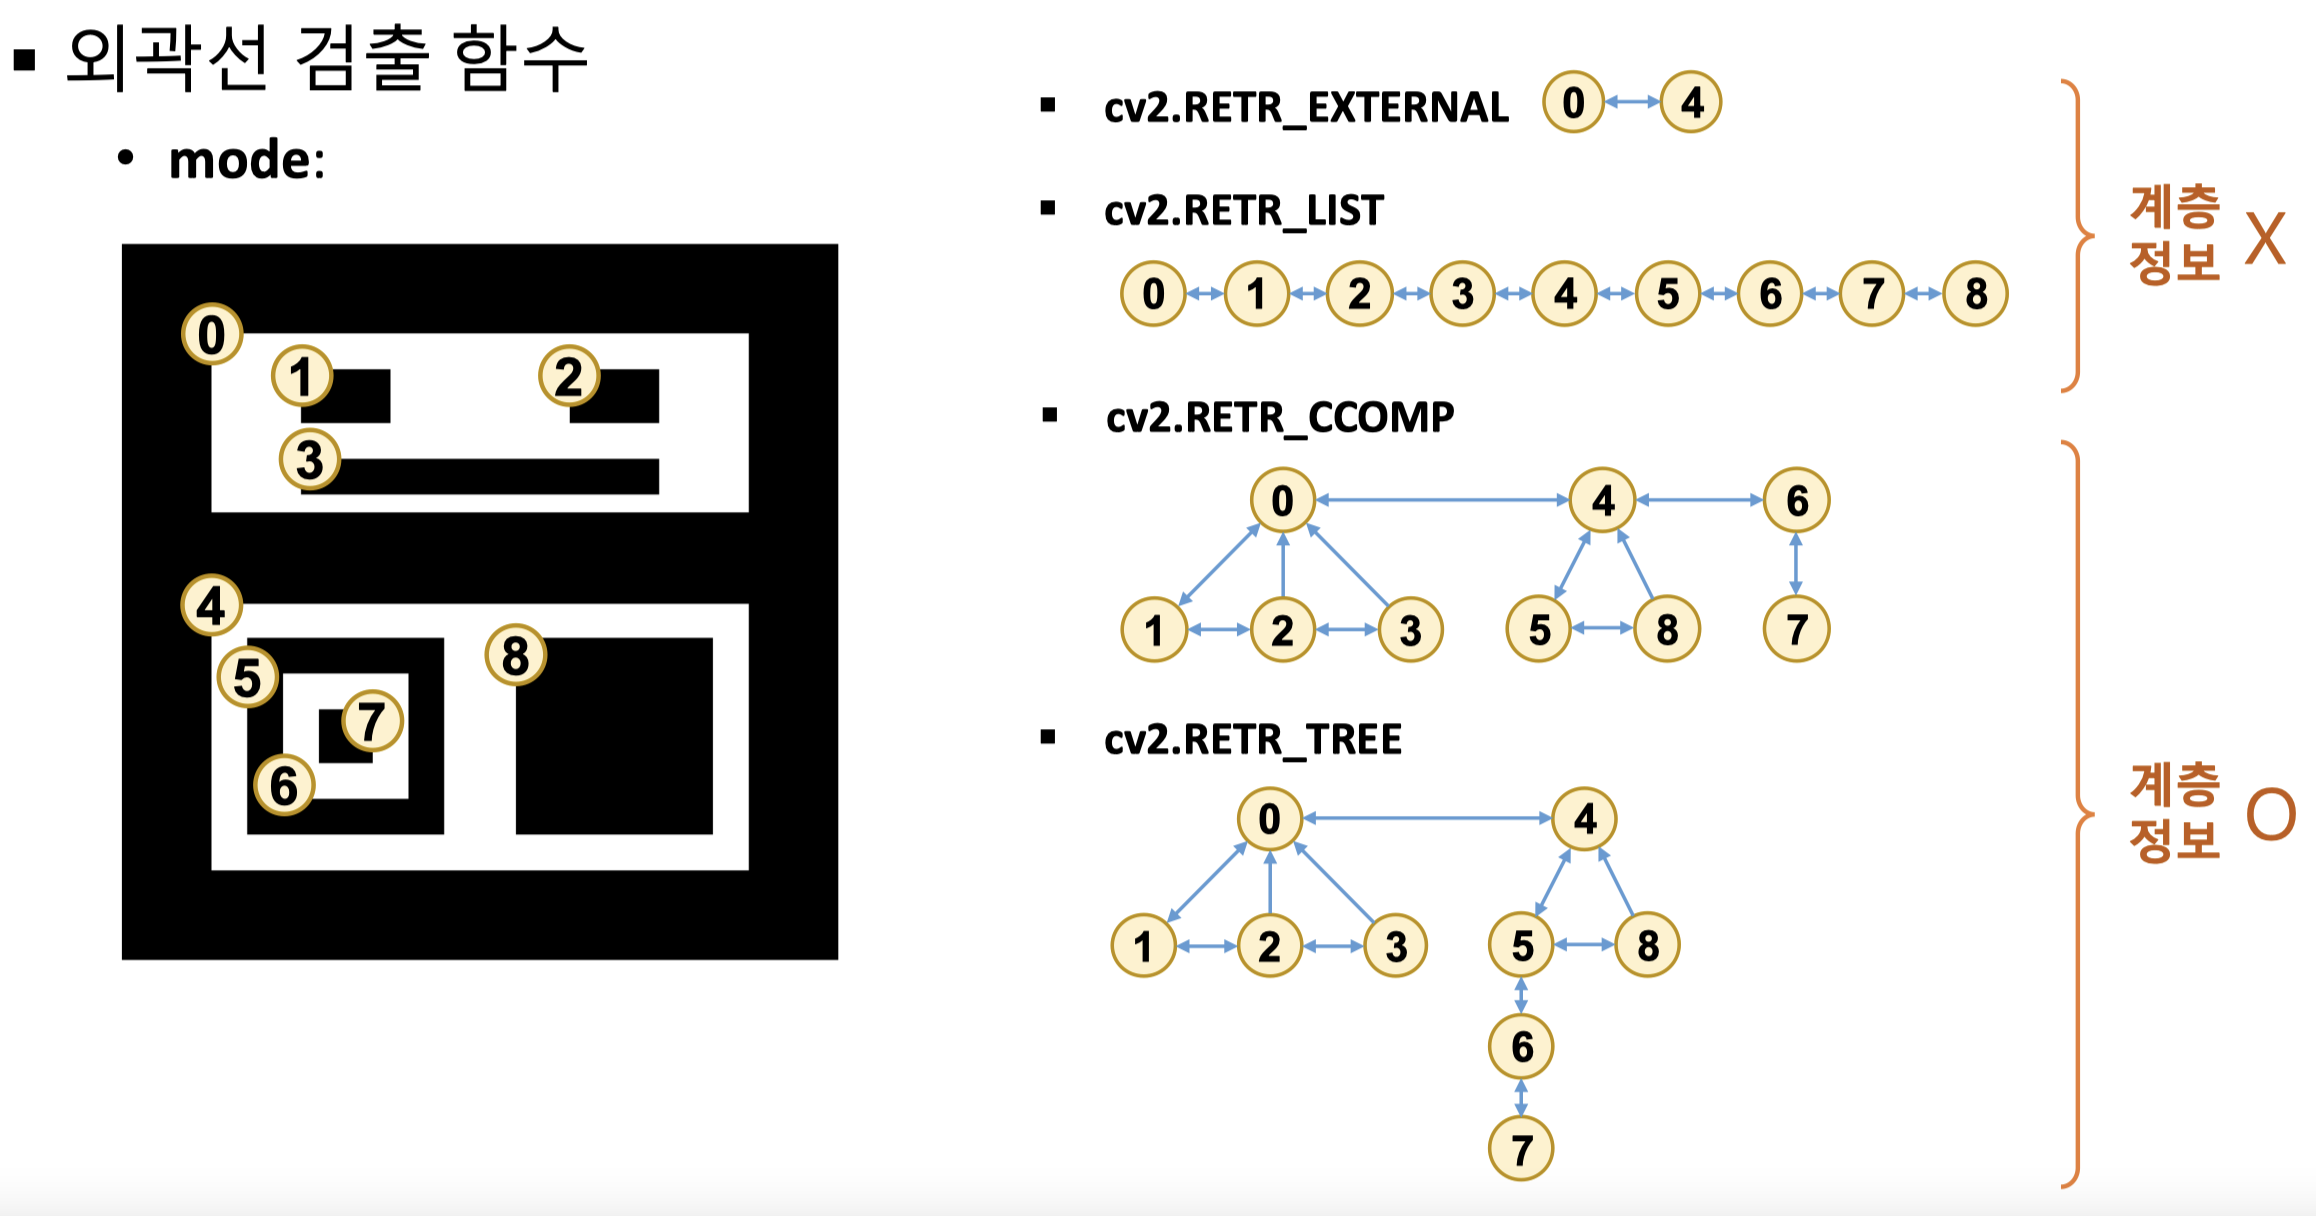

- method : 근사값 방식
  - cv2.CHAIN_APPROX_NONE : 모든 point를 저장
  - cv2.CHAIN_APPROX_SIMPLE : 4개의 point만을 저장하여 메모리를 절약
  - cv2.CHAIN_APPROX_TC89_L1 : Teh_Chin 연결 근사 알고리즘 L1버전을 적용하여 point 개수를 줄임
  - cv2.CHAIN_APPROX_TC89_KCOS : Teh_Chin 연결 근사 알고리즘 KCOS 버전을 적용하여 point 개수를 줄임
- return 값으로 오는 contours의 shape를 찍어보면 각각 method마다 shape이 다른것을 볼 수 있다.

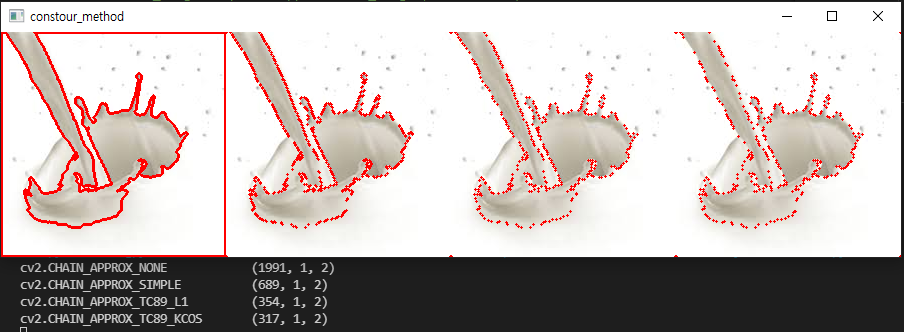

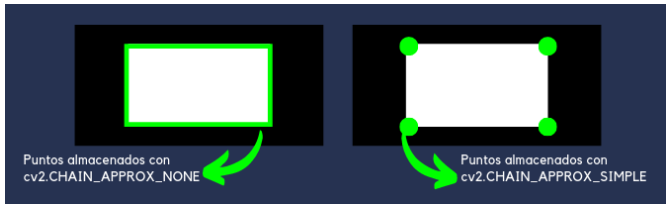


`cv2.drawContours(img, contours, contourIdx, color, thickness)`
- img : 입력 영상
- contours : 그림 그릴 컨투어 배열
  - `cv2.findContours()` 함수의 반환 결과를 전달해주면 됨
- contourIdx: 그림 그릴 컨투어 인덱스, -1: 모든 컨투어 표시
- color: 색상 값
- thickness: 선 두께, 0: 채우기

`cv2.darwContours()`는 실제로 컨투어 선을 그리는 함수입니다. img영상에 contours 배열에 있는 컨투어 중 contourIdx에 해당하는 컨투어를 color 색상과 thickness 두께로 선을 그립니다. 위 두 함수를 활용하여 컨투어를 그려보겠습니다.

In [ ]:
!python cntr_find.py

도형의 갯수: 3(3)
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



contour[0] shape: (316, 1, 2)
contour[1] shape: (448, 1, 2)
contour[2] shape: (336, 1, 2)
contour2[0] shape: (152, 1, 2)
contour2[1] shape: (4, 1, 2)
contour2[2] shape: (225, 1, 2)
도형의 갯수: 3(3)


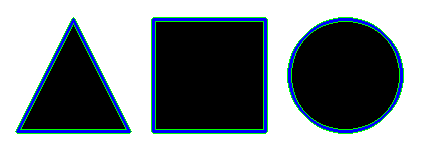

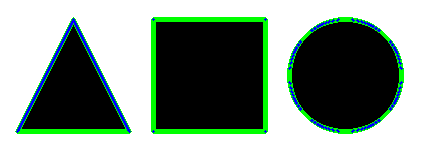

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/shapes.png')
img2 = img.copy()

#cv2_imshow(img)                   # 추가됨
#cv2_imshow(img2)                  # 추가됨

# 그레이 스케일로 변환 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                               cv2.CHAIN_APPROX_NONE)[-2:]
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)[-2:]
# contour 리스트의 모든 컨투어에 대해 shape 출력
for i, c in enumerate(contour):                   # 추가됨
    print(f"contour[{i}] shape: {c.shape}")       # 추가됨

# contour2 리스트의 모든 컨투어에 대해 shape 출력
for i, c in enumerate(contour2):                  # 추가됨
    print(f"contour2[{i}] shape: {c.shape}")      # 추가됨

# 각각의 컨투의 갯수 출력 ---⑤
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    #print("aaa")
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1)
        #print(j[0])

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    #print("bbb")
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1)
        #print(j[0])

# 결과 출력 ---⑩
#cv2.imshow('CHAIN_APPROX_NONE', img)
#cv2.imshow('CHAIN_APPROX_SIMPLE', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

왼쪽은 파라미터로 `cv2.CHAIN_APPROX_SIMPLE`을 사용해서 꼭짓점만 표시를 했고, 오른쪽은 `cv2.CHAIN_APPROX_NONE`을 사용해서 모든 좌표에 컨투어를 그렸습니다.

다음으로는 트리 계층의 컨투어를 그려보겠습니다.

In [ ]:
!python cntr_hierarchy.py

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


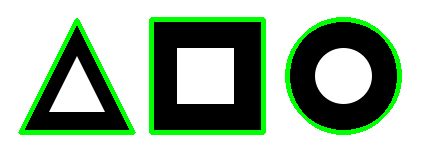

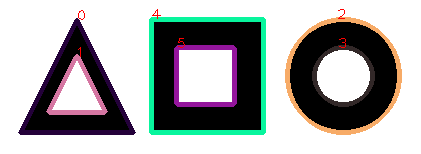

In [ ]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('../img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                               cv2.CHAIN_APPROX_NONE)[-2:]
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2):
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
#cv2.imshow('RETR_EXTERNAL', img)
#cv2.imshow('RETR_TREE', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

파라미터로 cv2.RETR_EXTERNAL을 전달할 때는 그림의 외곽 부분에만 컨투어를 그립니다.

하지만 cv2.RETR_TREE를 전달할 때는 모든 경계에 컨투어를 그립니다. 이를 트리 계층 컨투어라고 합니다.

위 그림에서는 보기 쉽게 다양한 색깔로 컨투어를 그렸습니다.

위 코드 중

`print(len(contour2), hierarchy)`

의 출력 결과를 살펴보겠습니다.

cv2.findContours() 함수를 호출하면 컨투어 좌표뿐만 아니라 hierarchy를 다음과 같이 출력합니다.

아래는 contour2, 즉 위 출력 그림에서 오른쪽 결과(트리 계층 컨투어)에 해당하는 hierarchy입니다.



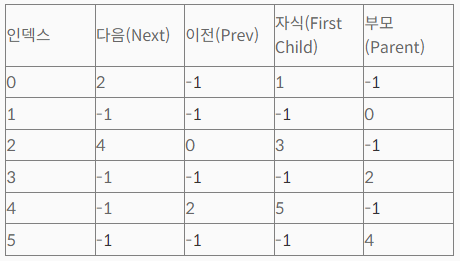

요소 값 중 -1은 의미 없음을 나타냅니다.

우선, 0번째 행을 보겠습니다.

0번째 행은 첫 번째 도형의 컨투어를 의미합니다. 이는 위 두 번째 그림에서 왼쪽의 삼각형 외곽을 뜻합니다.

0번째 행의 Next, Prev, First Child, Parent는 각각 2, -1, 1, -1입니다.

Prev와 Parent는 -1이므로 아무 의미가 없다는 뜻입니다. 즉, 삼각형 외곽 컨투어의 기준에는 이전 도형이 없고, 부모 도형도 없다는 뜻입니다.

그러나 Next와 First Child는 각 2와 1입니다. 이 말은 다음 도형은 2행이고, 자식은 1행이라는 것입니다. 2행인 4, 0 ,3 -1을 이루고 있는 컨투어는 맨 오른쪽 원 도형의 외곽입니다.

1행인 -1, -1, -1, 0은 왼쪽 삼각형의 내부 컨투어입니다. 자연스럽게 내부 삼각형의 부모는 0입니다. 2행인 4, 0 ,3 -1을 이루고 있는 컨투어의 다음 도형은 4행인 사각형 외곽이고, 이전은 0행인 삼각형 외곽이며, 자식은 3행인 원 내부입니다.

이런 식으로 컨투어 계층 정보(hierarchy)를 보면 외곽 요소와 자식 요소를 순회할 수 있습니다. 최외곽 컨투어만 골라내려면 부모 항목이 -1인 행만 찾으면 되고, 그것이 이 예제에서는 도형의 개수와 같습니다.

### 7.1.1 이미지 모멘트와 컨투어 속성

#### [모멘트](https://076923.github.io/posts/Python-opencv-25/)

OpenCV를 사용하여 이미지에서 도형의 컨투어(외곽선)를 찾고, 각 도형의 중심점, 넓이, 외곽선 길이 등을 계산한 후 이미지에 표시하는 예제

이미지에서 도형의 컨투어를 찾아내고, 각 도형의 중심점, 넓이, 외곽선 길이를 계산하여 이미지 위에 표시하는 코드입니다.

도형의 중심점에는 노란색 점이 표시되고, 넓이와 외곽선 길이는 각각 빨간색과 파란색 텍스트로 이미지에 나타납니다.

In [ ]:
!python cntr_moment.py

area:9870.00
area:12544.00
area:6216.00


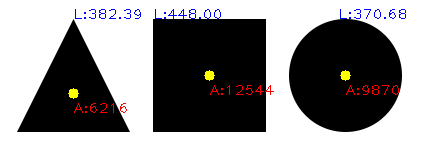

In [ ]:
import cv2
import numpy as np

img = cv2.imread("../img/shapes.png")
# 그레이 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
# 픽셀 값이 127 이상이면 0(검은색)으로, 127 미만이면 255(흰색)
# 도형 흰색, 배경 검은색
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]

# 각 도형의 컨투어에 대한 루프
for c in contours:
    # 모멘트 계산
    mmt = cv2.moments(c)
    #      각 컨투어의 모멘트를 계산합니다.
    #      모멘트는 컨투어의 무게 중심과 같은 특성들을 계산하는 데 사용됩니다.

    # m10/m00, m01/m00  중심점 계산
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00'])
    #      모멘트를 이용해 컨투어의 중심점(cx, cy) 계산.
    #      m10/m00과 m01/m00은 각각 x축과 y축에 대한 무게 중심을 의미함.

    # 영역 넓이 - m00 값은 컨투어의 넓이를 나타냄.
    a = mmt['m00']

    # 영역 외곽선 길이
    l = cv2.arcLength(c, True)
    #      cv2.arcLength 함수는 컨투어의 외곽선 길이 계산.
    #      True는 폐곡선(즉, 닫힌 형태의 도형)을 의미함.

    # 중심점에 노란색 점 그리기
    cv2.circle(img, (cx, cy), 5, (0, 255, 255), -1)
    # 중심점 근처에 넓이 그리기
    cv2.putText(img, "A:%.0f"%a, (cx, cy+20) , cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))
    # 컨투어 시작점에 길이 그리기
    cv2.putText(img, "L:%.2f"%l, tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (255,0,0))
    # 함수로 컨투어 넓이 계산해서 출력
    print("area:%.2f"%cv2.contourArea(c, False))

# 결과 출력
#cv2.imshow('center', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 컨투어를 감싸는 도형

[다양한 외곽선 관련 함수](https://deep-learning-study.tistory.com/232)

OpenCV를 활용하면 컨투어를 감싸는 도형을 그릴 수도 있습니다. 컨투어를 감싸는 도형을 그리는 아래 함수들에 대해 먼저 알아보겠습니다.

- `x, y, w, h = cv2.boundingRect(contour)`: 좌표를 감싸는 사각형 반환
  - x, y: 사각형의 왼쪽 상단 좌표
  - w, h: 사각형의 폭과 높이
- `rotateRect = cv2.minAreaRect(contour)` : 좌표를 감싸는 최소한의 사각형 계산
- `vertex = cv2.boxPoints(rotateRect)` : rotateRect로부터 꼭짓점 좌표 계산
  - vertex: 4개의 꼭짓점 좌표, 소수점 포함이므로 정수 변환 필요
- `center, radius = cv2.minEnclosingCircle(contour)` : 좌표를 감싸는 최소한의 동그라미 계산
  - center: 원점 좌표(x, y)
  - radius: 반지름
- `area, triangle = cv2.minEnclosingTriangle(points)` : 좌표를 감싸는 최소한의 삼각형 게산
  - area: 넓이
  - triangle: 3개의 꼭짓점 좌표
- `ellipse = cv2.fitEllipse(points)` : 좌표를 감싸는 최소한의 타원 계산
- `line = cv2.fitLine(points, distType, param, reps, aeps, line)` : 중심점을 통과하는 직선 계산
  - distType: 거리 계산 방식
    - `cv2.DIST_L2`
    - `cv2.DIST_L1`
    - `cv2.DIST_L12`
    - `cv2.DIST_FAIR`
    - `cv2.DIST_WELSCH`
    - `cv2.DIST_HUBER`
  - param: distType에 전달할 인자, 0 = 최적 값 선택
  - reps: 반지름 정확도, 선과 원본 좌표의 거리, 0.01 권장
  - aeps: 각도 정확도, 0.01 권장
  - line(optional): vx, vy 정규화된 단위 벡터, x0, y0: 중심점 좌표

위 함수를 활용하여 컨투어를 감싸는 다양한 도형을 그려보겠습니다.

In [ ]:
!python cntr_bound_fit.py

<class 'numpy.ndarray'> (332, 1, 2) int32


<ipython-input-34-43a4826c7d0d>:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)          # 정수로 변환


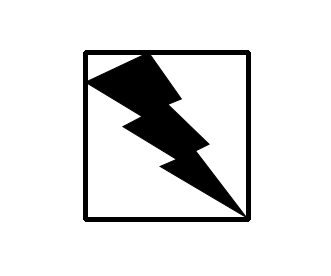

In [ ]:
import cv2
import numpy as np

# 이미지 읽어서 그레이스케일 변환, 바이너리 스케일 변환
img = cv2.imread("../img/lightning.png")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

# 컨튜어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)[-2:]
contr = contours[0]
print(type(contr), contr.shape, contr.dtype)

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
#cv2.drawContours(img, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파랑색)
(x,y), radius = cv2.minEnclosingCircle(contr)
#cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

# 최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(np.float32(contr))
#cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

# 최소한의 타원 표시(노랑색)
ellipse = cv2.fitEllipse(contr)
#cv2.ellipse(img, ellipse, (0,255,255), 3)

# 중심점 통과하는 직선 표시(빨강색)
vx,vy,x,y = cv2.fitLine(contr, cv2.DIST_L2,0,0.01,0.01)
cols,rows = img.shape[:2]
#cv2.line(img, (0, int(0-x*(vy/vx) + y)), (cols-1, int((cols-x)*(vy/vx) + y)), \
#                                                        (0,0,255),2)

# 결과 출력
#cv2.imshow('Bound Fit shapes', img)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

까만 번개 이미지 주위를 둘러싼 여러 도형들을 그려봤습니다.

### 7.1.2 컨투어 단순화

지금까지 살펴본 컨투어 함수는 이미지 외곽을 따라 그림을 그려주는 기능을 제공했습니다.

하지만 실생활에서 얻는 대부분의 이미지는 약간의 노이즈가 포함되어 있습니다.

그래서 컨투어를 너무 정확히 그리는 것도 바람직하지 않습니다.

오히려 약간 단순화해 그리는 게 정확하게 그리는 것보다 더 쓸모 있는 경우가 있습니다.

OpenCV는 아래와 같은 함수를 통해 근사 값으로 컨투어를 계산해줍니다.

`approx = cv2.approxPolyDP(contour, epsilon, closed)`
- contour: 대상 컨투어 좌표
- epsilon: 근사 값 정확도, 오차 범위
- closed: 컨투어의 닫힘 여부
- approx: 근사 계산한 컨투어 좌표

In [ ]:
!python cntr_approximate.py

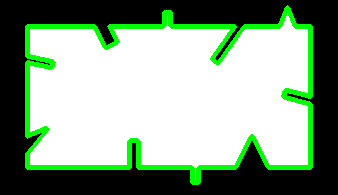

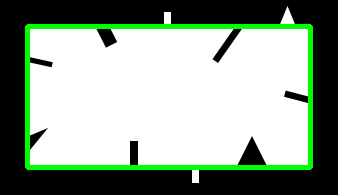

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/bad_rect.png')
img2 = img.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기 ---①
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)[-2:]
contour = contours[0]
# 전체 둘레의 0.05로 오차 범위 지정 ---②
epsilon = 0.05 * cv2.arcLength(contour, True)
# 근사 컨투어 계산 ---③
approx = cv2.approxPolyDP(contour, epsilon, True)

# 각각 컨투어 선 그리기 ---④
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

# 결과 출력
#cv2.imshow('contour', img)
#cv2.imshow('approx', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey()
cv2.destroyAllWindows()

cv2.approxPolyDP() 함수를 활용하면 오른쪽과 같이 요철이 있는 부분은 무시하고 컨투어를 계산해줍니다.

컨투어를 단순화하는 또 다른 형태는 볼록 선체(convex hull)를 만드는 것입니다. 볼록 선체란 어느 한 부분도 오목하지 않은 도형을 의미합니다. 따라서 볼록 선체는 대상을 완전히 포함하는 외곽 영역을 찾는데 유용합니다.

`hull = cv2.convexHull(points, hull, clockwise, returnPoints)`: 볼록 선체 계산
- points: 입력 컨투어
- hull(optional): 볼록 선체 결과
- clockwise(optional): 방향 지정 (True: 시계 방향)
- returnPoints(optional): 결과 좌표 형식 선택 (True: 볼록 선체 좌표 변환, False: 입력 컨투어 중에 볼록 선체에 해당하는 인덱스 반환)

`retval = cv2.isContourConvex(contour)`: 볼록 선체 만족 여부 확인
- retval: True인 경우 볼록 선체임

`defects = cv2.convexityDefects(contour, convexhull)`: 볼록 선체 결함 찾기
- contour: 입력 컨투어
-convexhull: 볼록 선체에 해당하는 컨투어의 인덱스
- defects: 볼록 선체 결함이 있는 컨투어의 배열 인덱스, N x 1 x 4 배열, [starts, end, farthest, distance]
  - start: 오목한 각이 시작되는 컨투어의 인덱스
  - end: 오목한 각이 끝나는 컨투어의 인덱스
  - farthest: 볼록 선체에서 가장 먼 오목한 지점의 컨투어 인덱스
  - distance: farthest와 볼록 선체와의 거리

In [ ]:
!python cntr_convexhull.py

False True


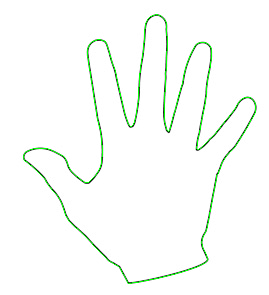

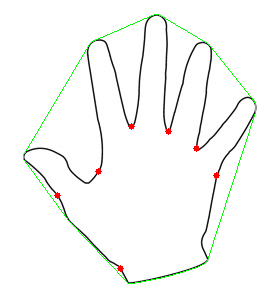

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/hand.jpg')
img2 = img.copy()
# 그레이 스케일 및 바이너리 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기와 그리기 ---②
contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                         cv2.CHAIN_APPROX_SIMPLE)[-2:]
cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0, 255,0), 1)

# 볼록 선체 찾기(좌표 기준)와 그리기 ---③
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 1)
# 볼록 선체 만족 여부 확인 ---④
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

# 볼록 선체 찾기(인덱스 기준) ---⑤
hull2 = cv2.convexHull(cntr, returnPoints=False)
# 볼록 선체 결함 찾기 ---⑥
defects = cv2.convexityDefects(cntr, hull2)
# 볼록 선체 결함 순회
for i in range(defects.shape[0]):
    # 시작, 종료, 가장 먼 지점, 거리 ---⑦
    startP, endP, farthestP, distance = defects[i, 0]
    # 가장 먼 지점의 좌표 구하기 ---⑧
    farthest = tuple(cntr[farthestP][0])
    # 거리를 부동 소수점으로 변환 ---⑨
    dist = distance/256.0
    # 거리가 1보다 큰 경우 ---⑩
    if dist > 1 :
        # 빨강색 점 표시
        cv2.circle(img2, farthest, 3, (0,0,255), -1)
# 결과 이미지 표시
#cv2.imshow('contour', img)
#cv2.imshow('convex hull', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

왼쪽은 손 모양 이미지에 대한 컨투어입니다.

오른쪽은 볼록 선체를 그려주었고, 또한 볼록 선체의 결점을 빨간 점으로 표시해주었습니다.

### 7.1.3 컨투어와 도형 매칭

서로 다른 물체의 컨투어를 비교하면 두 물체가 얼마나 비슷한지 알 수 있습니다.

이는 아래 함수로 간단히 구현할 수 있습니다.

`retval = cv2.matchShapes(contour1, contour2, method, parameter)`: 두 개의 컨투어로 도형 매칭
- contour1, contour2: 비교할 두 개의 컨투어
- method: 휴 모멘트 비교 알고리즘 선택 플래그 (`cv2.CONTOURS_MATCH_I1`, `cv2.CONTOURS_MATCH_I2`, `cv2.CONTOURS_MATCH_I3`)
- parameter: 알고리즘에 전달을 위한 예비 인수로 0으로 고정
- retval: 두 도형의 닮은 정도 (0=동일, 숫자가 클수록 다름)

In [ ]:
!python cntr_matchShape.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



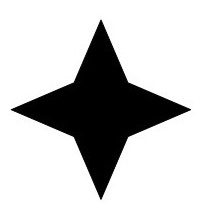

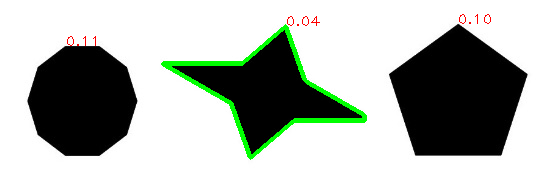

In [ ]:
import cv2
import numpy as np

# 매칭을 위한 이미지 읽기
target = cv2.imread('../img/4star.jpg') # 매칭 대상
shapes = cv2.imread('../img/shapestomatch.jpg') # 여러 도형
# 그레이 스케일 변환
targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]

# 각 도형과 매칭을 위한 반복문
matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
    # 대상 도형과 여러 도형 중 하나와 매칭 실행 ---①
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
    # 해당 도형의 매칭 점수와 컨투어를 쌍으로 저장 ---②
    matchs.append( (match, contr) )
    # 해당 도형의 컨투어 시작지점에 매칭 점수 표시 ---③
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]),\
                    cv2.FONT_HERSHEY_PLAIN, 1,(0,0,255),1 )
# 매칭 점수로 정렬 ---④
matchs.sort(key=lambda x : x[0])
# 가장 적은 매칭 점수를 얻는 도형의 컨투어에 선 그리기 ---⑤
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)
#cv2.imshow('target', target)
#cv2.imshow('Match Shape', shapes)

cv2_imshow(target)
cv2_imshow(shapes)

cv2.waitKey()
cv2.destroyAllWindows()

왼쪽의 별 모양 도형과 가장 유사한 도형을 오른쪽 세 도형 중 찾는 코드입니다.

매칭 정도를 숫자로 표현했고 (숫자가 작을수록 서로 닮은 도형임) 가장 닮은 도형 주위에 초록색 컨투어를 그려주었습니다.

지금까지 컨투어를 그리는 다양한 방법에 대해 알아봤습니다.

##7.2 허프 변환

허프 변환을 활용해 이미지에서 직선이나 원과 같은 다양한 모양을 인식할 수 있습니다.

여기서는 직선과 원을 검출하는 함수에 대해 배워보겠습니다.

허프 변환에 대한 이론적인 설명은 [opencv](https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html) 한글문서를 참고해주시기 바랍니다. 혹은 [한글 위키피디아](https://ko.wikipedia.org/wiki/%ED%97%88%ED%94%84_%EB%B3%80%ED%99%98)도 도움이 됩니다.

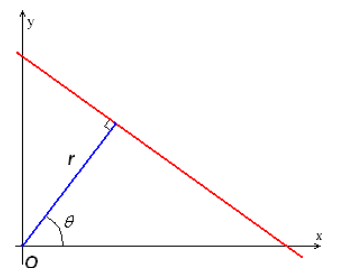

### 7.2.1 허프 선 변환

이미지는 수많은 픽셀로 구성되어 있습니다. 그 픽셀 중 서로 직선 관계를 갖는 픽셀들만 골라내는 것이 허프 선 변환의 핵심입니다. OpenCV에서는 허프 변환을 위해 아래와 같은 함수를 제공합니다.



`lines = cv2.HoughLines(img, rho, theta, threshold, lines, srn=0, stn=0, min_theta, max_theta)`
- img: 입력 이미지, 1 채널 바이너리 스케일
- rho: 거리 측정 해상도, 0~1
- theta: 각도, 라디안 단위 (np.pi/0~180)
- threshold: 직선으로 판단할 최소한의 동일 개수 (작은 값: 정확도 감소, 검출 개수 증가 / 큰 값: 정확도 증가, 검출 개수 감소)
- lines: 검출 결과, N x 1 x 2 배열 (r, Θ)
- srn, stn: 멀티 스케일 허프 변환에 사용, 선 검출에서는 사용 안 함
- min_theta, max_theta: 검출을 위해 사용할 최대, 최소 각도

거리와 각도를 얼마나 세밀하게 계산할 것인지를 rho와 theta 파라미터로 조정할 수 있습니다.

threshold는 같은 직선에 몇 개의 점이 등장해야 직선으로 판단할지를 나타내는 최소한의 개수를 말합니다.

아래는 직선을 검출하고 기준 좌표에 빨간 점을 찍은 예시입니다.

In [ ]:
!python hough_line.py

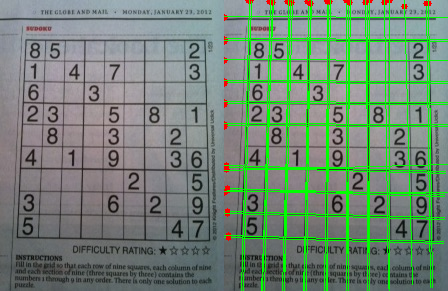

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/sudoku.jpg')
img2 = img.copy()
h, w = img.shape[:2]
# 그레이 스케일 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 100, 200 )
# 허프 선 검출 ---②
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
for line in lines: # 검출된 모든 선 순회
    r,theta = line[0] # 거리와 각도wh
    tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
    x0, y0 = tx*r, ty*r  #x, y 기준(절편) 좌표
    # 기준 좌표에 빨강색 점 그리기
    cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0,0,255), -1)
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)

#결과 출력
merged = np.hstack((img, img2))
#cv2.imshow('hough line', merged)
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

우선 캐니 엣지로 경계값을 검출한 뒤 허프 선 검출을 했습니다.

### 7.2.2 확률적 허프 선 변환

허프 선 검출은 모든 점에 대해 수많은 선을 그어서 직선을 찾기 때문에 연산량이 무척 많습니다.

이를 개선하기 위한 방법이 확률적 허프 선 변환입니다.

이는 모든 점을 고려하지 않고 무작위로 선정한 픽셀에 대해 허프 변환을 수행하고 점차 그 수를 증가시키는 방법입니다.

다음의 함수로 확률적 허프 선 변환을 수행할 수 있습니다.


`lines = cv2.HoughLinesP(img, rho, theta, threshold, lines, minLineLength, maxLineGap)`
- minLineLength(optional): 선으로 인정할 최소 길이
- maxLineGap(optional): 선으로 판단할 최대 간격
- lines: 검출된 선 좌표, N x 1 x 4 배열 (x1, y1, x2, y2)
- 이외의 파라미터는 cv2.HoughLines()와 동일

`cv2.HoughLines()`의 검출 결과는 r, Θ이지만 `cv2.HoughLinesP()`의 검출 결과는 선의 시작과 끝 좌표입니다.

이는 확률적으로 선을 검출하므로 당연히 `cv2.HoughLines()`보다 선 검출이 적습니다. 따라서 엣지를 강하게 하고 threshold를 낮게 지정해주어야 합니다.

In [ ]:
!python hough_lineP.py

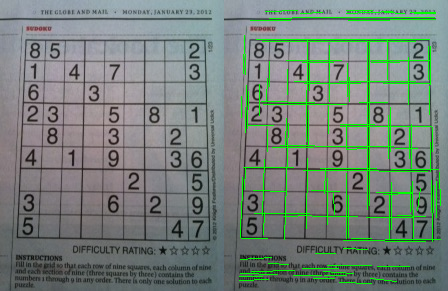

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/sudoku.jpg')
img2 = img.copy()
# 그레이 스케일로 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200 )

# 확율 허프 변환 적용 ---②
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    # 검출된 선 그리기 ---③
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

merged = np.hstack((img, img2))
#cv2.imshow('Probability hough line', merged)
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

확실히 `cv2.HoughLines()`보다는 선을 잘 검출하지 못 하는 것을 볼 수 있습니다.

하지만 속도는 더 빠를 겁니다.

`cv2.HoughLinesP()`의 반환 값이 선의 시작과 끝 좌표이므로 직선을 그리기가 더 편리합니다.

### 7.2.3 허프 원 변환

허프 변환을 통해 원을 검출할수도 있습니다.

`circle = cv2.HoughCircles(img, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)`
- img: 입력 이미지, 1채널 배열
- method: 검출 방식 선택 (현재 cv2.HOUGH_GRADIENT만 가능)
- dp: 입력 영상과 경사 누적의 해상도 반비례율, 1: 입력과 동일, 값이 커질수록 부정확
- minDist: 원들 중심 간의 최소 거리 (0: 에러, 0이면 동심원이 검출 불가하므로)
- circles(optional): 검출 원 결과, N x 1 x 3 부동 소수점 배열 (x, y, 반지름)
- param1(optional): 캐니 엣지에 전달할 스레시홀드 최대 값 (최소 값은 최대 값의 2배 작은 값을 전달)
- param2(optional): 경사도 누적 경계 값 (값이 작을수록 잘못된 원 검출)
- minRadius, maxRadius(optional): 원의 최소 반지름, 최대 반지름 (0이면 이미지 전체의 크기)

`cv2.HoughCircles`는 캐니 엣지를 수행하고 나서 소벨 필터를 적용해 엣지의 경사도(gradient)를 누적하는 방법으로 원 검출을 구현했습니다.

그래서 캐니 엣지 및 경사도 누적에 대한 파라미터(param1, param2)가 있는 것입니다.

In [ ]:
!python hough_circle.py

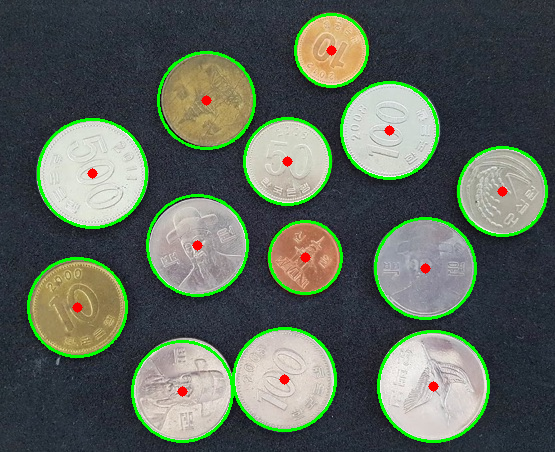

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/coins_spread1.jpg')
# 그레이 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 노이즈 제거를 위한 가우시안 블러 ---②
blur = cv2.GaussianBlur(gray, (3,3), 0)
# 허프 원 변환 적용( dp=1.5, minDist=30, cany_max=200 ) ---③
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 30, None, 200)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 원 둘레에 초록색 원 그리기
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2)
        # 원 중심점에 빨강색 원 그리기
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5)

# 결과 출력
#cv2.imshow('hough circle', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


동전을 검출하는 코드입니다.

`cv2.HoughCircles()`는 함수 자체적으로 캐니 엣지를 사용하므로 위 코드에서는 가우시안 블러를 통해 노이즈만 제거하고 엣지 검출을 따로 하지 않았습니다.

dp의 값은 1에 가까울수록 정확하게 원을 검출합니다.

dp 값은 점차 키워가면서 경험적으로 찾아야 합니다.

##7.3 연속 영역 분할

### 7.3.1 거리 변환

이미지에서 물체 영역을 정확히 파악하기 위해서는 물체 영역의 뼈대를 찾아야 합니다. 뼈대를 검출하는 방법 중 하나가 외곽 경계로부터 가장 멀리 떨어진 곳을 찾는 방법인 거리 변환입니다. OpenCV에는 거리 변환을 해주는 cv2.distanceTransform() 함수가 있습니다.


`cv2.distanceTransform(src, distanceType, maskSize)`
- src: 입력 영상, 바이너리 스케일
- distanceType: 거리 계산 방식
  - cv2.DIST_L2
  - cv2.DIST_L1
  - cv2.DIST_L12
  - cv2.DIST_FAIR
  - cv2.DIST_WELSCH
  - cv2.DIST_HUBER
- maskSize: 거리 변환 커널 크기

- cv2.DIST_L1
  - **맨해튼 거리(Manhattan distance)**라고도 불립니다.
  - 이 방식은 수직 및 수평 방향의 거리만 계산합니다. 즉, 두 점 사이의 거리는 각각의 좌표 차이의 합으로 계산됩니다.

  - 격자(grid) 기반의 거리 계산에서 유용하며, 가장 빠르게 계산할 수 있습니다.
  - 예시: 체스판에서 말이 움직이는 거리처럼, 직선으로만 이동하는 경우.

- cv2.DIST_L2
  - **유클리드 거리(Euclidean distance)**라고도 불립니다.
  - 이 방식은 두 점 사이의 직선 거리를 계산합니다. 피타고라스 정리를 사용하여 계산됩니다.
  - 가장 직관적이며 실제 물리적 거리를 측정할 때 유용합니다.
  - 예시: 두 점 사이의 직선 거리 측정.

- cv2.DIST_C
  - **체비쇼프 거리(Chebyshev distance)**라고도 불립니다.
  - 이 방식은 두 점 사이의 최대 축 방향 차이(maximum coordinate difference)를 거리로 측정합니다.
  - 바둑판 패턴에서 대각선 및 직선 방향 모두 동일한 거리로 계산할 수 있습니다.
  - 예시: 체스판에서 킹이 이동하는 경우와 유사한 방식.

- cv2.DIST_L12
  - L_{1-2} 거리는 혼합된 거리 계산 방식으로, 주로 다양한 거리를 결합한 형태로 사용됩니다.
  - L1+L2 형태로 결합된 거리 계산을 수행합니다.

- cv2.DIST_FAIR
  - **공정 거리(Fair distance)**는 두 점 사이의 거리 계산에서 좀 더 균형 잡힌 측정을 제공합니다.
  - 이 방법은 특히 노이즈가 있는 이미지에서 안정적인 거리 계산을 위해 사용될 수 있습니다.

- cv2.DIST_WELSCH
  - **웰치 거리(Welsch distance)**는 두 점 사이의 거리를 계산할 때, 거리가 커질수록 증가율이 감소하는 방식입니다. 따라서 극단적인 값(즉, 먼 거리)에 덜 민감한 방식으로 계산됩니다.

- cv2.DIST_HUBER
  - **후버 거리(Huber distance)**는 일반적인 유클리드 거리와 절대 거리(L1 거리) 사이에서 선택적인 거리 측정을 제공합니다. 작은 거리에서는 유클리드 거리처럼 계산되지만, 큰 거리에서는 절대 거리처럼 계산됩니다. 이는 노이즈에 강한 특성을 가집니다.

In [ ]:
!python distanceTrans.py

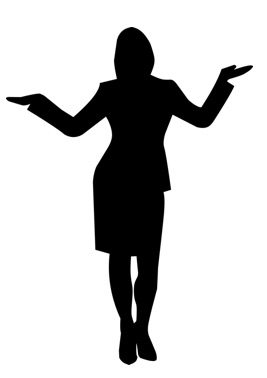

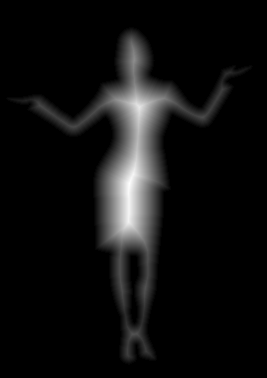

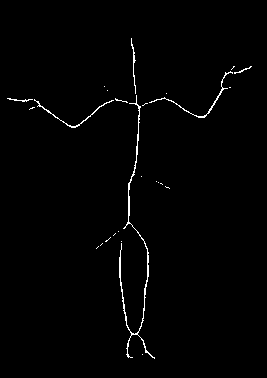

In [ ]:
import cv2
import numpy as np

# 이미지를 읽어서 바이너리 스케일로 변환
img = cv2.imread('../img/full_body.jpg', cv2.IMREAD_GRAYSCALE)
_, biimg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 거리 변환 ---①
dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 거리 값을 0 ~ 255 범위로 정규화 ---②
dst = (dst/(dst.max()-dst.min()) * 255).astype(np.uint8)
# 거리 값에 쓰레시홀드로 완전한 뼈대 찾기 ---③
skeleton = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                                 cv2.THRESH_BINARY, 7, -3)
# 결과 출력
#cv2.imshow('origin', img)
#cv2.imshow('dist', dst)
#cv2.imshow('skel', skeleton)

cv2_imshow(img)
cv2_imshow(dst)
cv2_imshow(skeleton)

cv2.waitKey(0)
cv2.destroyAllWindows()

왼쪽 이미지는 원본 이미지를 바이너리 스케일로 변환한 이미지입니다.

가운데 이미지는 0 ~ 255 범위로 정규화한 거리 변환 결과입니다.

외곽 경계로부터 멀어질수록 흰색이 짙어지는 걸 볼 수 있습니다.

오른쪽 이미지는 가운데 이미지에서 픽셀 값=255(흰색)에 해당하는 부분만 추출한 것입니다.

이는 이미지의 뼈대라고도 볼 수 있습니다.

경계로부터 가장 멀리 떨어져 있는 부분만 추출한 것입니다.

이를 거리 변환을 통한 뼈대 추출이라고 합니다.

### 7.3.2 연결 요소 레이블링

연결된 요소끼리 분리하는 방법 중 레이블링이라는 방법이 있습니다.

아래와 같이 이미지에서 픽셀 값이 0으로 끊어지지 않는 부분끼리 같은 값을 부여해서 분리를 할 수 있습니다.

OpenCV에서 제공하는 `cv2.connectedComponents()` 함수를 활용하면 이를 구현할 수 있습니다.

이 함수는 이미지 전체에서 0으로 끊어지지 않는 부분끼리 같은 값을 부여합니다.

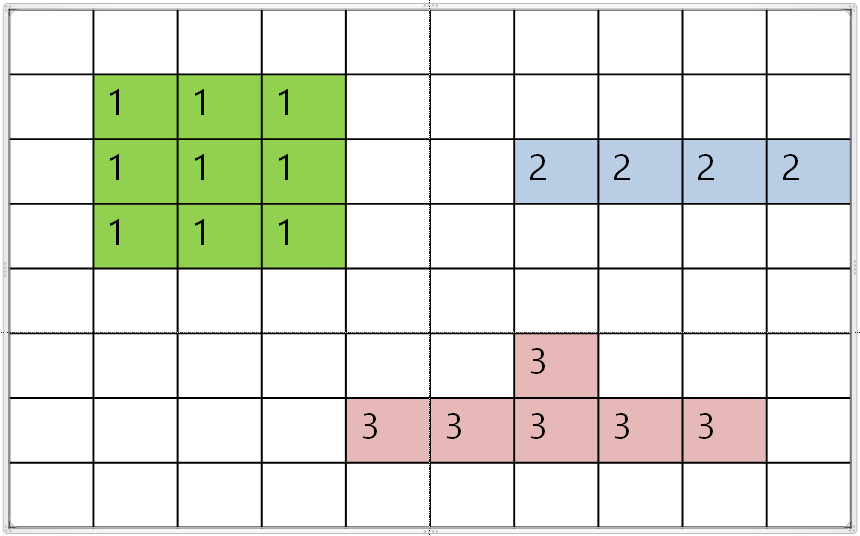

`retval, labels = cv2.connectedComponents(src, labels, connectivity=8, ltype)` : 연결 요소 레이블링과 개수 반환

- src : 입력 이미지, 바이너리 스케일
- labels(optional) : 레이블링된 입력 이미지와 같은 크기의 배열
- connectivity(optional) : 연결성을 검사할 방향 개수(4, 8 중 선택)
- ltype(optional) : 결과 레이블 배열 dtype
- retval(optional) : 레이블 개수

`retval, labels, stats, centroids = cv2.connectedComponentsWithStats(src, labels, stats, centroids, connectivity, ltype)` : 레이블링된 각종 상태 정보 반환
- stats: N x 5 행렬 (N: 레이블 개수) [x좌표, y좌표, 폭, 높이, 너비]
- centroids: 각 레이블의 중심점 좌표, N x 2 행렬 (N: 레이블 개수)

`cv2.connectedComponents()` 함수를 활용해서 연결된 요소끼리 같은 색상을 칠해보겠습니다. 주석 처리된 `cv2.connectedComponentsWithStats()`로 코드를 돌려도 동일한 결과가 나올 겁니다.

In [ ]:
!python connected_label.py

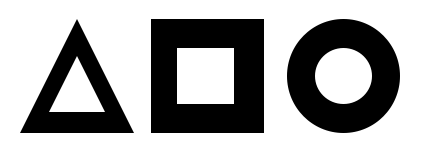

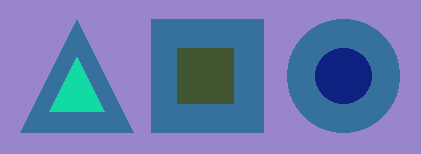

In [ ]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('../img/shapes_donut.png')
# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용 ---①
cnt, labels = cv2.connectedComponents(th)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용 ---②
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]

# 결과 출력
#cv2.imshow('origin', img)
#cv2.imshow('labeled', img2)
cv2_imshow(img)
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

연결된 부분끼리 같은 색상이 칠해진 것을 볼 수 있습니다.

위에서 말했다시피 `cv2.connectedComponents()` 함수는 이미지 전체에서 0으로 끊어지지 않는 부분끼리 같은 값을 부여합니다.

반환된 결과를 순회하면서 같은 값끼리는 같은 색상을 칠해주었습니다.

### 7.3.3 색 채우기

그림판 같은 그리기 도구에서 채우기 기능을 활용하여 색상을 칠해본 경험이 있을 겁니다. OpenCV의 `cv2.floodFill()`은 이런 기능을 제공합니다. 연속되는 영역에 같은 색상을 채워 넣는 기능을 합니다.

`retval, img, mask, rect = cv2.floodFill(img, mask, seed, newVal, loDiff, upDiff, flags)`
- img: 입력 이미지, 1 또는 3채널
- mask: 입력 이미지보다 2 x 2 픽셀이 더 큰 배열, 0이 아닌 영역을 만나면 채우기 중지
- seed: 채우기 시작할 좌표
- newVal: 채우기에 사용할 색상 값
- loDiff, upDiff(optional): 채우기 진행을 결정할 최소/최대 차이 값
- flags(optional): 채우기 방식 선택
  - `cv2.FLOODFILL_MASK_ONLY` : img가 아닌 mask에만 채우기 적용, cv2.FLOODFILL_FIXED_RANGE: 이웃 픽셀이 아닌 seed 픽셀과 비교
- retval: 채우기 한 픽셀의 개수
- rect: 채우기가 이루어진 영역을 감싸는 사각형

이 함수는 img 이미지의 seed 좌표에서부터 시작해서 newVal의 값으로 채우기를 시작합니다.

이때 이웃하는 픽셀에 채우기를 계속하려면 현재 픽셀이 이웃 픽셀의 loDiff를 뺀 값보다 크거나 같고 upDiff를 더한 값보다 작거나 같아야 합니다.

이것을 식으로 정리하면 아래와 같습니다. (만약 loDiff와 upDiff를 생략하면 seed의 픽셀 값과 같은 값을 갖는 이웃 픽셀만 채우기를 진행합니다.)

`이웃 픽셀 - loDiff <= 현재 픽셀 <= 이웃 픽셀 + upDiff`

하지만, 마지막 인자인 flags에 `cv2.FLOODFILL_FIXED_RANGE`가 전달되면 이웃 픽셀이 아닌 seed 픽셀과 비교하며 색을 채웁니다.

또한, flags에 `cv2.FLOODFILL_MASK_ONLY`가 전달되면 img에 채우기를 하지 않고 mask에만 채우기를 합니다.

In [ ]:
!python flood_fill.py

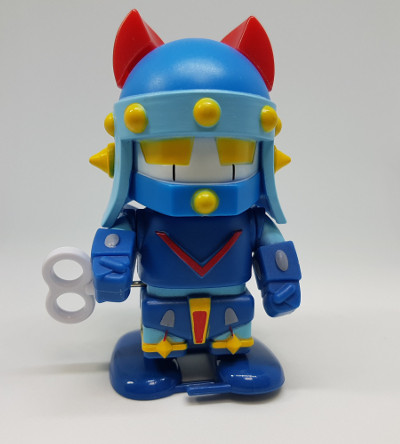

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:753: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
rows, cols = img.shape[:2]
# 마스크 생성, 원래 이미지 보다 2픽셀 크게 ---①
mask = np.zeros((rows+2, cols+2), np.uint8)
# 채우기에 사용할 색 ---②
newVal = (255,255,255)
# 최소 최대 차이 값 ---③
loDiff, upDiff = (10,10,10), (10,10,10)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mask, img
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x,y)
        # 색 채우기 적용 ---④
        retval = cv2.floodFill(img, mask, seed, newVal, loDiff, upDiff)
        # 채우기 변경 결과 표시 ---⑤
        cv2.imshow('img', img)

# 화면 출력
#cv2.imshow('img', img)
cv2_imshow(img)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

마우스로 특정 영역을 클릭하면 특정 영역을 흰색으로 채우는 코드입니다.

위 코드에서 mask는 원본 이미지의 크기보다 높이와 너비를 각 2씩 크게 만들어야 합니다.

채우기에 사용할 색은 (255, 255, 255) 즉 흰색을 사용했습니다.

loDiff와 upDiff, 즉 이웃한 픽셀과의 최소/최대 차이 값을 각 10으로 정했습니다.

### 7.3.4 [워터셰드](http://www.gisdeveloper.co.kr/?p=6740)

워터셰드(watershed)는 강물이 한 줄기로 흐르다가 갈라지는 경계인 분수령을 뜻합니다.

워터셰드는 앞서 살펴본 색 채우기(flood fill)과 비슷한 방식으로 연속된 영역을 찾는 것이라고 볼 수 있습니다. 다만, seed를 하나가 아닌 여러 개를 지정할 수 있고 이를 마커라고 합니다.

`markers = cv2.watershed(img, markers)`
- img : 입력 이미지
- markers : 마커, 입력 이미지와 크기가 같은 1차원 배열(int32)

markers는 입력 이미지와 행과 열 크기가 같은 1차원 배열로 전달해야 합니다.

markers의 값은 경계를 찾고자 하는 픽셀 영역은 -1을 갖게 하고 나머지 연결된 영역에 대해서는 동일한 정수 값을 갖게 합니다.

예를 들어 1은 배경, 2는 전경인 식입니다. `cv2.watershed()` 함수를 활용해 경계를 나눠보겠습니다.

In [ ]:
!python watershed.py

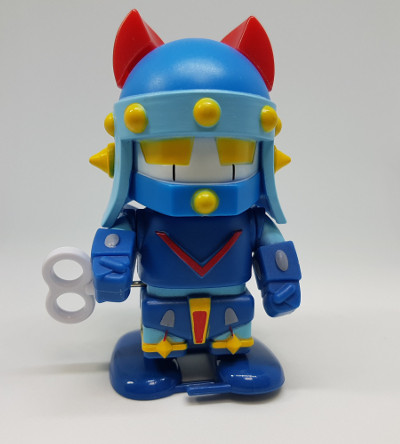

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:753: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
rows, cols = img.shape[:2]
img_draw = img.copy()

# 마커 생성, 모든 요소는 0으로 초기화 ---①
marker = np.zeros((rows, cols), np.int32)
markerId = 1        # 마커 아이디는 1에서 시작
colors = []         # 마커 선택한 영역 색상 저장할 공간
isDragging = False  # 드래그 여부 확인 변수

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global img_draw, marker, markerId, isDragging
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작
        isDragging = True
        # 각 마커의 아이디와 현 위치의 색상 값을 쌍으로 매핑해서 저장
        colors.append((markerId, img[y,x]))
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임
        if isDragging:                  # 드래그 진행 중
            # 마우스 좌표에 해당하는 마커의 좌표에 동일한 마커 아이디로 채워 넣기 ---②
            marker[y,x] = markerId
            # 마커 표시한 곳을 빨강색점으로 표시해서 출력
            cv2.circle(img_draw, (x,y), 3, (0,0,255), -1)
            cv2.imshow('watershed', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업
        if isDragging:
            isDragging = False          # 드래그 중지
            # 다음 마커 선택을 위해 마커 아이디 증가 ---③
            markerId +=1
    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪽 마우스 버튼 누름
            # 모아 놓은 마커를 이용해서 워터 쉐드 적용 ---④
            cv2.watershed(img, marker)
            # 마커에 -1로 표시된 경계를 초록색으로 표시  ---⑤
            img_draw[marker == -1] = (0,255,0)
            for mid, color in colors: # 선택한 마커 아이디 갯수 만큼 반복
                # 같은 마커 아이디 값을 갖는 영역을 마커 선택한 색상으로 채우기 ---⑥
                img_draw[marker==mid] = color
            cv2.imshow('watershed', img_draw) # 표시한 결과 출력

# 화면 출력
#cv2.imshow('watershed', img)
cv2_imshow(img)

cv2.setMouseCallback('watershed', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

이미지의 전경과 배경을 분리하는 코드입니다. 마우스를 드래그하여 로봇 태권 V 내부를 표시해주고, 또 배경도 따로 표시해줍니다.

그런 다음 오른쪽 마우스 버튼을 클릭하면 전경과 배경이 구분된 이미지를 얻을 수 있습니다.

우선은 아래 코드를 통해 0으로 채워진 마커를 생성합니다.

`marker = np.zeros((rows, cols), np.int32)`

그다음 아래 코드를 통해 마우스 드래그한 부분의 좌표에 해당하는 마커 좌표에 현재의 마커 아이디를 채웁니다.

이 예제에서는 전경은 1, 배경은 2로 채웁니다.
이것은 앞서 살펴본 색 채우기(flood fill)의 seed 값이 여러 개인 것 과 같은 의미입니다.

`marker[y,x] = markerId`

그 다음 마우스 오른쪽 버튼을 클릭하면 아래 코드로 워터셰드를 실행합니다.
워터셰드를 실행하면 경계에 해당하는 영역은 -1로 채워지고 전경은 1, 배경은 2로 채워집니다.

`cv2.watershed(img, marker)`

마지막으로 -1로 채워진 마커와 같은 좌표의 이미지 픽셀은 초록색으로 바꾸고, 같은 마커 아이디 값을 갖는 영역끼리 같은 색으로 채웁니다.
이때 색은 맨 처음 마우스 왼쪽 버튼을 클릭했을 때 좌표의 픽셀 값으로 지정했습니다.
그래서 위 그림에서는 전경은 빨간색으로 채워졌고, 배경은 회색으로 채워졌습니다.
맨 처음 전경을 선택할 때 귀부분(빨간색)을 클릭했습니다.

워터셰드는 경계 검출이 어려운 경우 사용할 수 있습니다.

전경이나 배경으로 확신할 수 있는 몇몇 픽셀을 지정해줌으로써 경계를 찾을 수 있습니다.

### 7.3.5 그랩컷

그랩컷은 사용자가 전경(배경이 아닌 부분)으로 분리할 부분에 사각형 표시를 해주면 전경과 배경의 색상 분포를 추정해서 동일한 레이블을 가진 연결된 영역에서 전경과 배경을 분리합니다.

아래의 함수로 그랩컷을 구현할 수 있습니다.


`mask, bgdModel, fgdModel = cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, mode)`
- img: 입력 이미지
- mask: 입력 이미지와 크기가 같은 1 채널 배열, 배경과 전경을 구분하는 값을 저장
  - `cv2.GC_BGD` : 확실한 배경(0),
  - `cv2.GC_FGD` : 확실한 전경(1)
  - `cv2.GC_PR_BGD` : 아마도 배경(2),
  - `cv2.GC_PR_FGD` : 아마도 전경(3)
- rect: 전경이 있을 것으로 추측되는 영역의 사각형 좌표, 튜플 (x1, y1, x2, y2)
- bgdModel, fgdModel: 함수 내에서 사용할 임시 배열 버퍼 (재사용할 경우 수정하지 말 것)
- iterCount: 반복 횟수
- mode(optional): 동작 방법
  - `cv2.GC_INIT_WITH_RECT` : rect에 지정한 좌표를 기준으로 그랩컷 수행
  - `cv2.GC_INIT_WITH_MASK` : mask에 지정한 값을 기준으로 그랩컷 수행
  - `cv2.GC_EVAL`: 재시도

mode에 `cv2.GC_INIT_WITH_RECT`를 전달하면 세 번째 파라미터인 rect에 전달한 사각형 좌표를 가지고 전경과 배경을 분리합니다.

그 결과를 두 번째 파라미터인 mask에 할당해 반환합니다.

mask에 할당받은 값이 0과 1이면 확실한 배경, 전경을 의미하고, 2와 3이면 아마도 배경, 전경일 가능성이 있다는 뜻입니다.

이렇게 1차적으로 배경과 전경을 구분한 뒤 mode에 `cv2.GC_INIT_WITH_MASK`를 지정해서 다시 호출하면 좀 더 정확한 mask를 얻을 수 있습니다.

이때 bgdModel과 fgdModel은 함수가 내부적으로 연산에 사용하는 임시 배열로 다음 호출 시 이전 연산을 반영하기 위해 재사용하므로 그 내용을 수정하면 안 됩니다.

아래는 그랩컷을 활용하여 배경을 분리하는 예제 코드입니다.

우선 마우스로 드래그하여 전경 외곽 영역을 표시해줍니다. 1차적으로 배경과 전경이 분리됩니다.

배경을 추가로 제거하고 싶으면 원본 이미지에 쉬프트 키를 누른 상태로 마우스로 검은색 선을 그어주면 됩니다.

잘못 제거된 전경을 추가하고 싶으면 원본 이미지에 컨트롤키를 누른 상태로 마우스로 흰색 선을 그어주면 됩니다.

In [ ]:
!python grabcut.py

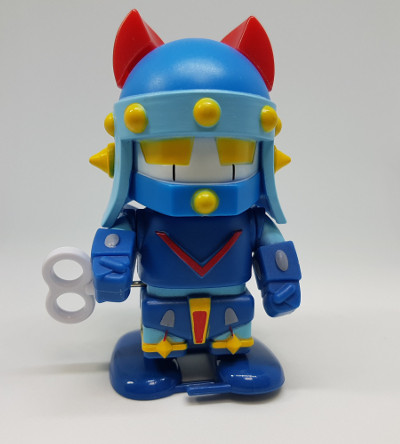

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:753: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
img_draw = img.copy()
mask = np.zeros(img.shape[:2], dtype=np.uint8)  # 마스크 생성
rect = [0,0,0,0]    # 사각형 영역 좌표 초기화
mode = cv2.GC_EVAL  # 그랩컷 초기 모드
# 배경 및 전경 모델 버퍼
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mouse_mode, rect, mask, mode
    if event == cv2.EVENT_LBUTTONDOWN : # 왼쪽 마우스 누름
        if flags <= 1: # 아무 키도 안 눌렀으면
            mode = cv2.GC_INIT_WITH_RECT # 드래그 시작, 사각형 모드 ---①
            rect[:2] = x, y # 시작 좌표 저장
    # 마우스가 움직이고 왼쪽 버튼이 눌러진 상태
    elif event == cv2.EVENT_MOUSEMOVE and flags & cv2.EVENT_FLAG_LBUTTON :
        if mode == cv2.GC_INIT_WITH_RECT: # 드래그 진행 중 ---②
            img_temp = img.copy()
            # 드래그 사각형 화면에 표시
            cv2.rectangle(img_temp, (rect[0], rect[1]), (x, y), (0,255,0), 2)
            cv2.imshow('img', img_temp)
        elif flags > 1: # 키가 눌러진 상태
            mode = cv2.GC_INIT_WITH_MASK    # 마스크 모드 ---③
            if flags & cv2.EVENT_FLAG_CTRLKEY :# 컨트롤 키, 분명한 전경
                # 흰색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (255,255,255),-1)
                # 마스크에 GC_FGD로 채우기      ---④
                cv2.circle(mask,(x,y),3, cv2.GC_FGD,-1)
            if flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트키, 분명한 배경
                # 검정색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (0,0,0),-1)
                # 마스크에 GC_BGD로 채우기      ---⑤
                cv2.circle(mask,(x,y),3, cv2.GC_BGD,-1)
            cv2.imshow('img', img_draw) # 그려진 모습 화면에 출력
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼 뗀 상태 ---⑥
        if mode == cv2.GC_INIT_WITH_RECT : # 사각형 그리기 종료
            rect[2:] =x, y # 사각형 마지막 좌표 수집
            # 사각형 그려서 화면에 출력 ---⑦
            cv2.rectangle(img_draw, (rect[0], rect[1]), (x, y), (255,0,0), 2)
            #cv2.imshow('img', img_draw)
            cv2_imshow(img_draw)
        # 그랩컷 적용 ---⑧
        cv2.grabCut(img, mask, tuple(rect), bgdmodel, fgdmodel, 1, mode)
        img2 = img.copy()
        # 마스크에 확실한 배경, 아마도 배경으로 표시된 영역을 0으로 채우기
        img2[(mask==cv2.GC_BGD) | (mask==cv2.GC_PR_BGD)] = 0
        #cv2.imshow('grabcut', img2) # 최종 결과 출력
        cv2_imshow(img2) # 최종 결과 출력
        mode = cv2.GC_EVAL # 그랩컷 모드 리셋
# 초기 화면 출력 및 마우스 이벤트 등록
#cv2.imshow('img', img)
cv2_imshow(img)
cv2.setMouseCallback('img', onMouse)
while True:
    if cv2.waitKey(0) & 0xFF == 27 : # esc
        break
cv2.destroyAllWindows()

마우스 이벤트 처리 때문에 코드가 다소 길어졌습니다. 맨 처음 마우스 드래그로 사각형을 그려주었습니다.

처음 마우스 버튼을 누른 좌표와 마지막으로 마우스 버튼을 뗀 좌표를 구해서 `cv2.grabCut()`을 호출할 때 mode를 `cv2.GC_INIT_WITH_RECT`로 설정해서 호출하면 됩니다.

그다음 쉬프트와 컨트롤키를 누른 상태로 마우스 드래그를 해주었을 때의 좌표를 mask에 반영했다가 마우스 뗀 시점에 `cv2.grabCut()`을 호출하여 mode에 `cv2.GC_INIT_WITH_MASK`를 전달하면 됩니다.

이때 쉬프트와 컨트롤키에 따라 mask에 반영할 값이 `cv2.GC_BGD` 또는 `cv2.GC_FGD`가 됩니다.

마우스 이벤트를 처리하는 `onMouse()` 함수를 뜯어보겠습니다. 우선 아래 코드는 키보드의 아무 키도 누르지 않은 상태로 마우스 왼쪽 버튼을 클릭했을 때를 처리해줍니다.

`mode = cv2.GC_INIT_WITH_RECT`으로 설정하고 시작 좌표를 구합니다.


```
    if event == cv2.EVENT_LBUTTONDOWN : # 왼쪽 마우스 누름
        if flags <= 1: # 아무 키도 안 눌렀으면
            mode = cv2.GC_INIT_WITH_RECT # 드래그 시작, 사각형 모드 ---①
            rect[:2] = x, y # 시작 좌표 저장
```

아래 코드는 마우스 왼쪽 버튼이 눌러진 상태로 드래그되었을 때를 처리해줍니다.

마우스 왼쪽 버튼이 눌러진 상태로 드래그가 되었는데 그때의 mode가 `cv2.GC_INIT_WITH_RECT`이라면, 단순히 마우스가 움직이는 동안 화면에 사각형을 표시합니다.

mode가 `cv2.GC_INIT_WITH_RECT`라는 것은 키보드를 아무것도 누르지 않았다는 뜻입니다.

```
# 마우스가 움직이고 왼쪽 버튼이 눌러진 상태
    elif event == cv2.EVENT_MOUSEMOVE and flags & cv2.EVENT_FLAG_LBUTTON :
        if mode == cv2.GC_INIT_WITH_RECT: # 드래그 진행 중 ---②
            img_temp = img.copy()
            # 드래그 사각형 화면에 표시
            cv2.rectangle(img_temp, (rect[0], rect[1]), (x, y), (0,255,0), 2)
            cv2.imshow('img', img_temp)
```

반면, 마우스 왼쪽 버튼이 눌러진 상태로 드래그가 되었는데 그때의 mode가 `cv2.GC_INIT_WITH_RECT`이 아니고, flags가 1보다 크다면 아래의 코드가 실행됩니다.

flags가 1보다 크다는 것은 키보드의 어떤 버튼이 눌렸다는 뜻입니다. 쉬프트든 컨트롤이든 눌렸다는 거죠.

이때는 mode를 `cv2.GC_INIT_WITH_MASK`로 설정합니다. 그리고 컨트롤/쉬프트 키가 눌렸을 때에 대해 각각 화면에 흰색 점, 검은색 점을 표시합니다.

또한 마우스가 움직인 좌표에 해당하는 mask 인덱스에 각각 `cv2.GC_FGD/cv2.GC_BGD`을 반영했습니다.

`cv2.GC_FGD`는 확실한 전경, `cv2.GC_BGD`는 확실한 배경을 뜻합니다.

```
        elif flags > 1: # 키가 눌러진 상태
            mode = cv2.GC_INIT_WITH_MASK    # 마스크 모드 ---③
            if flags & cv2.EVENT_FLAG_CTRLKEY :# 컨트롤 키, 분명한 전경
                # 흰색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (255,255,255),-1)
                # 마스크에 GC_FGD로 채우기      ---④
                cv2.circle(mask,(x,y),3, cv2.GC_FGD,-1)
            if flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트키, 분명한 배경
                # 검정색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (0,0,0),-1)
                # 마스크에 GC_BGD로 채우기      ---⑤
                cv2.circle(mask,(x,y),3, cv2.GC_BGD,-1)
            cv2.imshow('img', img_draw) # 그려진 모습 화면에 출력
```
아래 코드는 마우스를 뗀 지점의 좌표를 구해서 사각형을 표시합니다.

```
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼 뗀 상태 ---⑥
        if mode == cv2.GC_INIT_WITH_RECT : # 사각형 그리기 종료
            rect[2:] =x, y # 사각형 마지막 좌표 수집
            # 사각형 그려서 화면에 출력 ---⑦
            cv2.rectangle(img_draw, (rect[0], rect[1]), (x, y), (255,0,0), 2)
            cv2.imshow('img', img_draw)
```

최종적으로 아래의 코드로 그랩컷을 적용합니다.

mask에서 배경으로 표시된 cv2.GC_BGD(확실한 배경), cv2.GC_PR_BGD(아마도 배경)에 해당하는 좌표를 0으로 채워서 배경을 제거합니다.

그리고 최종 결과를 출력합니다.

```
        cv2.grabCut(img, mask, tuple(rect), bgdmodel, fgdmodel, 1, mode)
        img2 = img.copy()
        # 마스크에 확실한 배경, 아마도 배경으로 표시된 영역을 0으로 채우기
        img2[(mask==cv2.GC_BGD) | (mask==cv2.GC_PR_BGD)] = 0
        cv2.imshow('grabcut', img2) # 최종 결과 출력
        mode = cv2.GC_EVAL # 그랩컷 모드 리셋
```
사실 그랩컷을 적용하는 코드는 한 줄이지만, 마우스 이벤트 처리 때문에 코드가 다소 복잡해졌습니다.

### 7.3.6 평균 이동 필터

평균 이동 필터를 활용하면 물감으로 그림을 그린 것과 같이 이미지를 바꿀 수 있습니다. 평균 이동 필터를 제공하는 OpenCV 함수는 아래와 같습니다.

`dst = cv2.pyrMeanShiftFiltering(src, sp, sr, dst, maxLevel, termcrit)`
- src: 입력 이미지
- sp: 공간 윈도 반지름 크기
- sr: 색상 윈도 반지름 크기
- maxLevel(optional): 이미지 피라미드 최대 레벨
- termcrit(optional): 반복 중지 요건
  - `type = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS` : 중지 형식
    - `cv2.TERM_CRITERIA_EPS` : 정확도가 최소 정확도(epsilon) 보다 작아지면 중지
    - `cv2.TERM_CRITERIA_MAX_ITER` : 최대 반복 횟수(max_iter)에 도달하면 중지
  - default max_iter=5 : 최대 반복 횟수
  - default epsilon=1 : 최소 정확도

이 함수는 내부적으로 이미지 피라미드를 만들어 작은 이미지의 평균 이동 결과를 큰 이미지에 적용합니다.

그래서 함수 이름 앞에 pyr가 붙었습니다. src에는 입력 이미지가 전달되는데 그레이 스케일과 컬러 스케일 모두 가능합니다.

sp 파라미터는 평균 이동(MeanShift)에 사용할 윈도 크기입니다.

몇 픽셀씩 묶어서 평균을 내어 이동할지를 결정합니다. sr 파라미터는 색상 윈도 크기로 색상 값의 차이 범위를 지정합니다.

평균을 계산할 때 값의 차이가 sr 값의 범위 안에 있는 픽셀만을 대상으로 합니다.

따라서 sr이 너무 작으면 원본과 별 차이가 없고, 너무 크면 원본과 많이 달라집니다.

maxLevel은 이미지 피라미드 최대 레벨입니다. 이 값이 0보다 크면 그 값만큼 작은 이미지 피라미드로 평균 이동해서 얻은 결과를 적용합니다.

값이 클수록 속도가 빨라지지만 영역과 색상이 거칠어집니다.

termcrit은 반복을 중지할 기준을 지정하는 파라미터입니다.

In [ ]:
!python mean_shift.py

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
# 트랙바 이벤트 처리 함수
def onChange(x):
    #sp, sr, level 선택 값 수집
    sp = cv2.getTrackbarPos('sp', 'img')
    sr = cv2.getTrackbarPos('sr', 'img')
    lv = cv2.getTrackbarPos('lv', 'img')

    # 평균 이동 필터 적용 ---①
    mean = cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    # 변환 이미지 출력
    cv2.imshow('img', np.hstack((img, mean)))

# 초기 화면 출력
#cv2.imshow('img', np.hstack((img, img)))
cv2_imshow(np.hstack((img, img)))
# 트랙바 이벤트 함수 연결
cv2.createTrackbar('sp', 'img', 0,100, onChange)
cv2.createTrackbar('sr', 'img', 0,100, onChange)
cv2.createTrackbar('lv', 'img', 0,5, onChange)
cv2.waitKey(0)
cv2.destroyAllWindows()

트랙바로 정한 sp, sr, maxLevel을 설정해서 평균 이동 필터를 적용한 예제입니다.

##7.4 실전 워크숍

### 7.4.1 도형 알아맞히기

In [ ]:
!python workshop_shape.py

In [ ]:
import cv2
import numpy as np

# 이미지를 읽어서 그레이 스케일 및 스레시홀드 변환
img = cv2.imread("../img/5shapes.jpg")
img2 = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)[-2:]

for contour in contours:
    # 각 컨투어에 근사 컨투어로 단순화
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    # 꼭지점의 갯수
    vertices = len(approx)
    print("vertices:", vertices)

    # 중심점 찾기
    mmt = cv2.moments(contour)
    cx,cy = int(mmt['m10']/mmt['m00']), int(mmt['m01']/mmt['m00'])

    name = "Unkown"
    if vertices == 3: # 꼭지점이 3개는 삼각형
        name = "Triangle"
        color = (0,255,0)
    elif vertices == 4: # 꼭지점 4개는 사각형
        x,y,w,h = cv2.boundingRect(contour)
        if abs(w-h) <= 3:   # 폭과 높이의 차이가 3보다 작으면 정사각형
            name = 'Square'
            color = (0,125,255)
        else:               # 폭과 높이 차이가 3보다 크면 직사각형
            name = 'Rectangle'
            color = (0,0,255)
    elif vertices == 10:  # 꼭 지점 갯수 10개는 별
        name = 'Star'
        color = (255,255,0)
    elif vertices >= 15: # 꼭 지점 10개 이상이면 원
        name = 'Circle'
        color = (0,255,255)
    # 컨투어 그리기
    cv2.drawContours(img2, [contour], -1, color, -1)
    # 도형 이름 출력
    cv2.putText(img2, name, (cx-50, cy), cv2.FONT_HERSHEY_COMPLEX_SMALL,\
                                                         1, (100,100,100), 1)

cv2.imshow('Input Shapes', img)
cv2.imshow('Recognizing Shapes', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.4.2 문서 스캐너

In [ ]:
!python workshop_paper_scan.py

In [ ]:
import cv2
import numpy as np

win_name = 'scan'
# 이미지 읽기
img = cv2.imread("../img/paper.jpg")
cv2.imshow('original', img)
cv2.waitKey(0)
draw = img.copy()

# 그레이스 스케일 변환 및 케니 엣지
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0) # 가우시안 블러로 노이즈 제거
edged = cv2.Canny(gray, 75, 200)    # 케니 엣지로 경계 검출
cv2.imshow(win_name, edged)
cv2.waitKey(0)

# 컨투어 찾기
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)[-2:]
# 모든 컨투어 그리기
cv2.drawContours(draw, cnts, -1, (0,255,0))
cv2.imshow(win_name, draw)
cv2.waitKey(0)

# 컨투어들 중에 영역 크기 순으로 정렬
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
for c in cnts:
    # 영역이 가장 큰 컨투어 부터 근사 컨투어 단순화
    peri = cv2.arcLength(c, True)   # 둘레 길이
    # 둘레 길이의 0.02 근사값으로 근사화
    vertices = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(vertices) == 4: # 근사한 꼭지점이 4개면 중지
        break
pts = vertices.reshape(4, 2) # N x 1 x 2 배열을 4 x 2크기로 조정
for x,y in pts:
    cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
cv2.imshow(win_name, draw)
cv2.waitKey(0)
merged = np.hstack((img, draw))

#### 이하 [예제 5-8]과 동일 ####
# 좌표 4개 중 상하좌우 찾기 ---②
sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

# 변환 전 4개 좌표
pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

# 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③
w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이

# 변환 후 4개 좌표
pts2 = np.float32([[0,0], [width-1,0],
                    [width-1,height-1], [0,height-1]])

# 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
# 원근 변환 적용
result = cv2.warpPerspective(img, mtrx, (width, height))
cv2.imshow(win_name, result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.4.3 동전 개수 세기

In [ ]:
!python workshop_coin_count.py

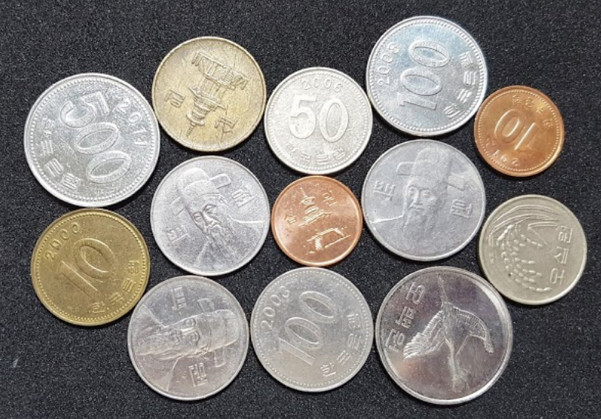

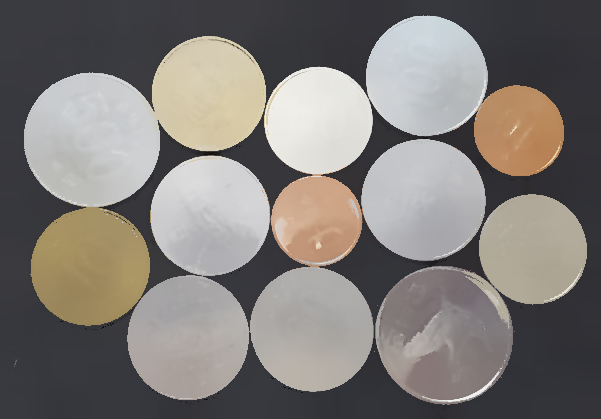

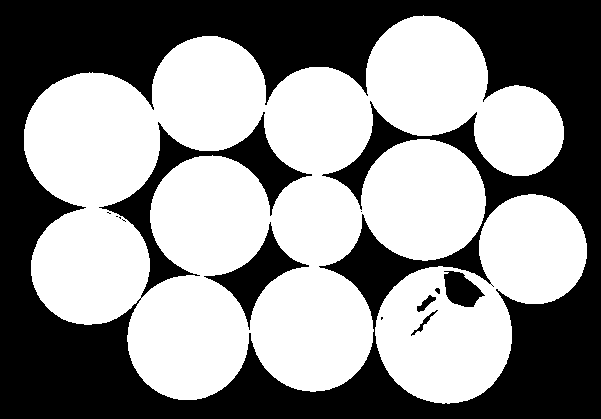

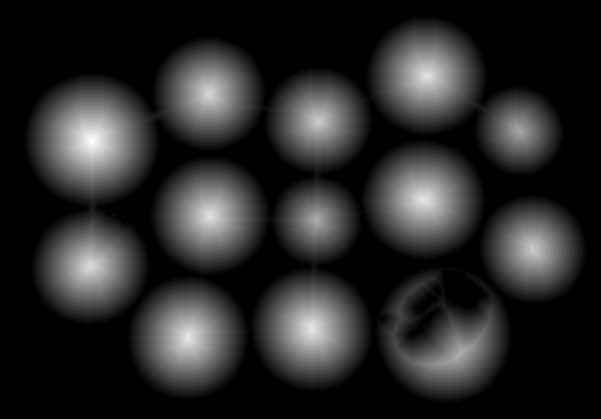

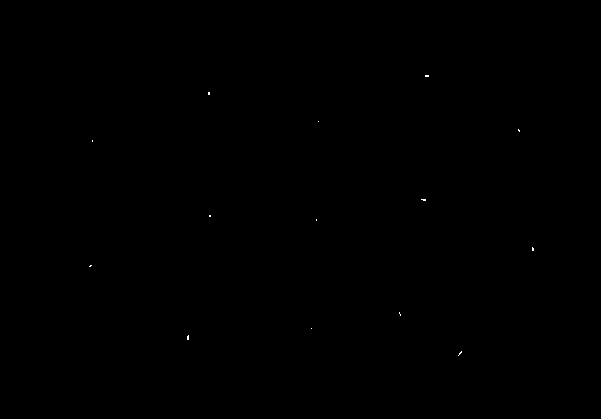

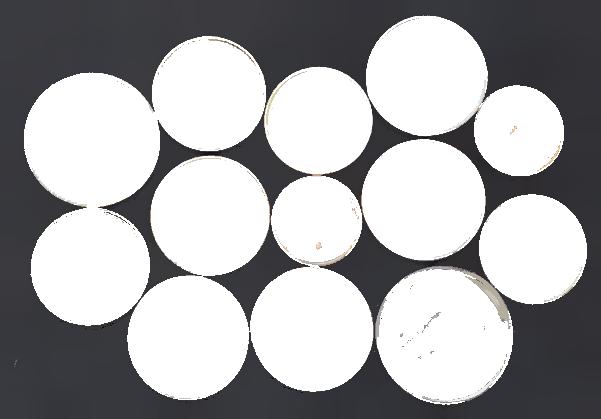

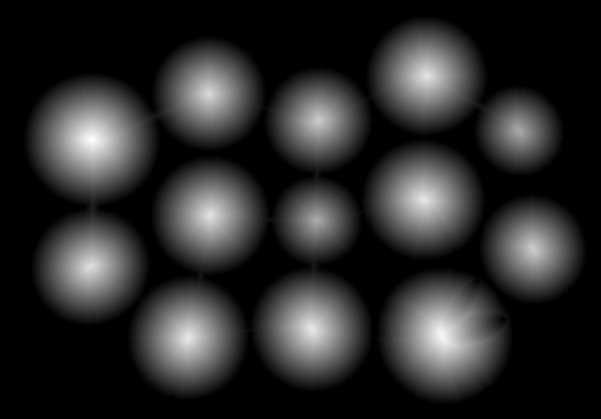

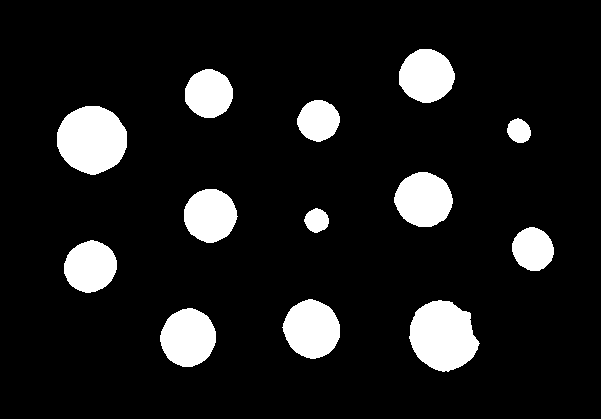

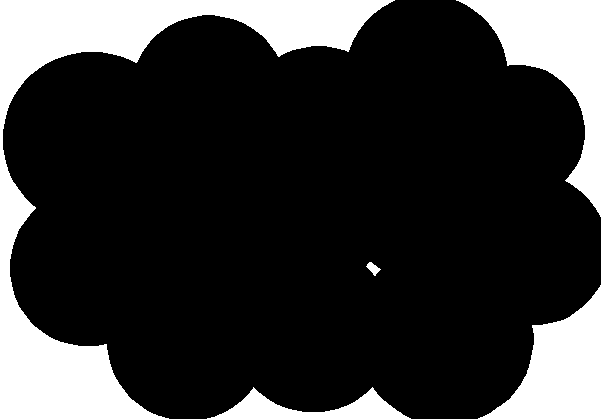

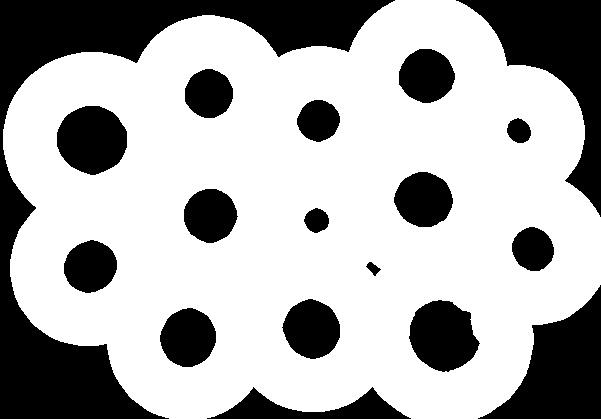

워터쉐드 전: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


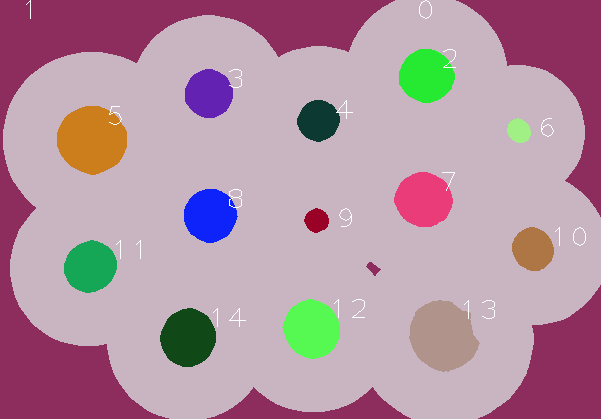

워터쉐드 후: [-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


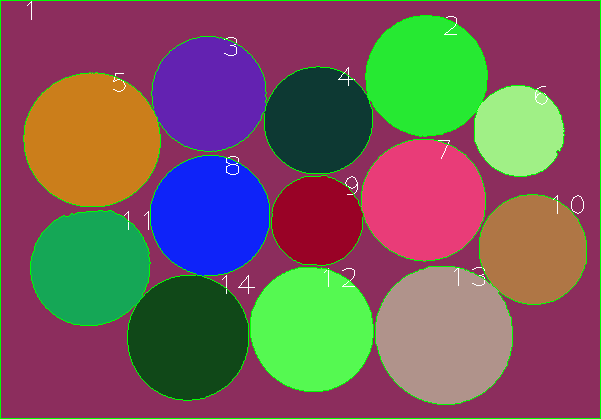

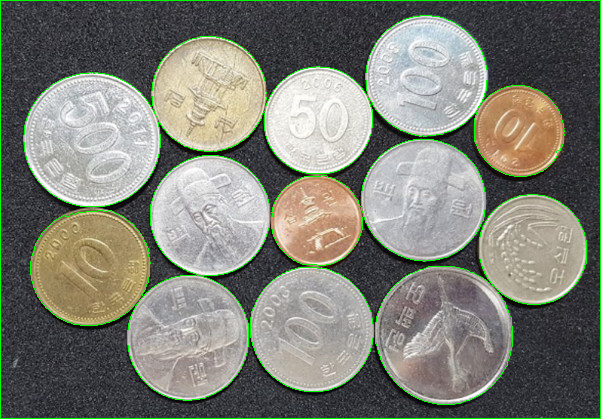

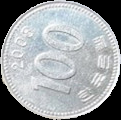

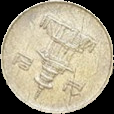

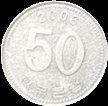

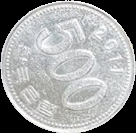

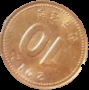

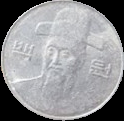

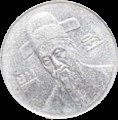

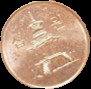

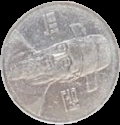

In [ ]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('../img/coins_connected.jpg')
rows, cols = img.shape[:2]
#cv2.imshow('original', img)
cv2_imshow(img)


# 동전 표면을 흐릿하게 피라미드평균시프트 적용
mean = cv2.pyrMeanShiftFiltering(img, 20, 50)
#cv2.imshow('mean', mean)
cv2_imshow(mean)
# 바이너리 이미지 변환
gray = cv2.cvtColor(mean, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3,3), 0)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2.imshow('thresh', thresh)
cv2_imshow(thresh)
# 거리 변환
dst = cv2.distanceTransform(thresh, cv2.DIST_L2, 3)
# 거리 값을 0 ~255로 변환
dst = ( dst / (dst.max() - dst.min()) * 255 ).astype(np.uint8)
#cv2.imshow('dst', dst)
cv2_imshow(dst)

# 거리 변환결과에서 로칼 최대 값 구하기
## 팽창 적용(동전 크기 정도의 구조화 요소 필요),
localMx = cv2.dilate(dst, np.ones((50,50), np.uint8))
## 로칼 최대 값 저장 할 배열 생성
lm = np.zeros((rows, cols), np.uint8)
## 팽창 적용전 이미지와 같은 픽셀이 로컬 최대 값이므로 255로 설정
lm[(localMx==dst) & (dst != 0)] = 255
#cv2.imshow('localMx', lm)
cv2_imshow(lm)

# 로컬 최대값으로 색 채우기
## 로컬 최대 값이 있는 좌표 구하기
seeds = np.where(lm ==255)
seed = np.stack( (seeds[1], seeds[0]), axis=-1)
## 색 채우기를 위한 채우기 마스크 생성
fill_mask = np.zeros((rows+2, cols+2), np.uint8)
for x,y in seed:
    ## 로칼 최대값을 시드로해서 평균 시프트 영상에 색채우기
    ret = cv2.floodFill(mean, fill_mask, (x,y), (255,255,255), \
                                            (10,10,10), (10,10,10))
#cv2.imshow('floodFill', mean)
cv2_imshow(mean)

# 색 채우기 적용한 영상에 다시 거리 변환 적용
gray = cv2.cvtColor(mean, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
dst = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
dst = ( (dst / (dst.max() - dst.min())) * 255 ).astype(np.uint8)
#cv2.imshow('dst2', dst)
cv2_imshow(dst)

# 거리 변환 결과값의 절반 이상을 차지한 영역은 확실한 전경으로 설정
ret, sure_fg = cv2.threshold(dst, 0.5*dst.max(), 255,0)
#cv2.imshow('sure_fg', sure_fg)
cv2_imshow(sure_fg)

# 거리 변환 결과를 반전해서 확실한 배경 찾기
_, bg_th = cv2.threshold(dst, 0.3*dst.max(),  255, cv2.THRESH_BINARY_INV)
bg_dst = cv2.distanceTransform(bg_th, cv2.DIST_L2, 5)
bg_dst = ( (bg_dst / (bg_dst.max() - bg_dst.min())) * 255 ).astype(np.uint8)
ret, sure_bg = cv2.threshold(bg_dst, 0.3*bg_dst.max(), 255,cv2.THRESH_BINARY)
#cv2.imshow('sure_bg', sure_bg)
cv2_imshow(sure_bg)


# 불확실한 영역 설정 : 확실한 배경을 반전해서 확실한 전경을 빼기
ret, inv_sure_bg = cv2.threshold(sure_bg, 127, 255,cv2.THRESH_BINARY_INV)
unkown = cv2.subtract(inv_sure_bg, sure_fg)
#cv2.imshow('unkown', unkown)
cv2_imshow(unkown)

# 연결된 요소 레이블링
_, markers = cv2.connectedComponents(sure_fg)

# 레이블링을 1씩 증가 시키고 0번 레이블 알 수 없는 영역을 0번 레이블로 설정
markers = markers+1
markers[unkown ==255] = 0
print("워터쉐드 전:", np.unique(markers))
colors = []
marker_show = np.zeros_like(img)
for mid in np.unique(markers): # 선택한 마커 아이디 갯수 만큼 반복
    color = [int(j) for j in np.random.randint(0,255, 3)]
    colors.append((mid, color))
    marker_show[markers==mid] = color
    coords = np.where(markers==mid)
    x, y = coords[1][0], coords[0][0]
    cv2.putText(marker_show, str(mid), (x+20, y+20), cv2.FONT_HERSHEY_PLAIN, \
                                                             2, (255,255,255))
#cv2.imshow('before', marker_show)
cv2_imshow(marker_show)

# 레이블링이 완성된 마커로 워터 쉐드 적용
markers = cv2.watershed(img, markers)
print("워터쉐드 후:", np.unique(markers))

for mid, color in colors: # 선택한 마커 아이디 갯수 만큼 반복
    marker_show[markers==mid] = color
    coords = np.where(markers==mid)
    if coords[0].size <= 0 :
        continue
    x, y = coords[1][0], coords[0][0]
    cv2.putText(marker_show, str(mid), (x+20, y+20), cv2.FONT_HERSHEY_PLAIN, \
                                                             2, (255,255,255))
marker_show[markers==-1] = (0,255,0)
#cv2.imshow('watershed marker', marker_show)
cv2_imshow(marker_show)

img[markers==-1] = (0,255,0)
#cv2.imshow('watershed', img)
cv2_imshow(img)

# 동전 추출을 위한 마스킹 생성
mask = np.zeros((rows, cols), np.uint8)
# 배경 마스크 생성
mask[markers!=1] = 255
# 배경 지우기
nobg = cv2.bitwise_and(img, img, mask=mask)
# 동전만 있는 라벨 생성 (배경(1), 경계(-1) 없는)
coin_label = [l for l in np.unique(markers) if (l != 1 and l !=-1)]
# 동전 라벨 순회 하면서 동전 영역만 추출
for i, label in enumerate(coin_label):
    mask[:,:] = 0
    # 해당 동전 추출 마스크 생성
    mask[markers ==label] = 255
    # 동전 영역만 마스크로 추출
    coins = cv2.bitwise_and(img, img, mask=mask)
    # 동전 하나만 있는 곳에서 최외곽 컨투어 추출
    contour, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,\
                                         cv2.CHAIN_APPROX_NONE)[-2:]
    # 동전을 감싸는 사각형 좌표
    x,y,w,h = cv2.boundingRect(contour[0])
    # 동전 영역만 추출해서 출력
    coin = coins[y:y+h, x:x+w]
    #cv2.imshow('coin%d'%(i+1), coin)
    cv2_imshow(coin)
    cv2.imwrite('../img/coin_test/coin%d.jpg'%(i+1), coin)
cv2.waitKey()
cv2.destroyAllWindows()

# 참고

주요 거리 계산 방식
cv2.DIST_L1

**맨해튼 거리(Manhattan distance)**라고도 불립니다.
이 방식은 수직 및 수평 방향의 거리만 계산합니다. 즉, 두 점 사이의 거리는 각각의 좌표 차이의 합으로 계산됩니다.
수식:
$𝑑(𝑝,𝑞)=∣𝑥1−𝑥2∣+
∣
𝑦
1
−
𝑦
2
∣
d(p,q)=∣x
1
​
 −x
2
​
 ∣+∣y
1
​
 −y
2
​
 ∣
이 방법은 격자(grid) 기반의 거리 계산에서 유용하며, 가장 빠르게 계산할 수 있습니다.
예시: 체스판에서 말이 움직이는 거리처럼, 직선으로만 이동하는 경우.
cv2.DIST_L2

**유클리드 거리(Euclidean distance)**라고도 불립니다.
이 방식은 두 점 사이의 직선 거리를 계산합니다. 피타고라스 정리를 사용하여 계산됩니다.
수식:
𝑑
(
𝑝
,
𝑞
)
=
(
𝑥
1
−
𝑥
2
)
2
+
(
𝑦
1
−
𝑦
2
)
2
d(p,q)=
(x
1
​
 −x
2
​
 )
2
 +(y
1
​
 −y
2
​
 )
2

​

가장 직관적이며 실제 물리적 거리를 측정할 때 유용합니다.
예시: 두 점 사이의 직선 거리 측정.
cv2.DIST_C

**체비쇼프 거리(Chebyshev distance)**라고도 불립니다.
이 방식은 두 점 사이의 최대 축 방향 차이(maximum coordinate difference)를 거리로 측정합니다.
수식:
𝑑
(
𝑝
,
𝑞
)
=
max
⁡
(
∣
𝑥
1
−
𝑥
2
∣
,
∣
𝑦
1
−
𝑦
2
∣
)
d(p,q)=max(∣x
1
​
 −x
2
​
 ∣,∣y
1
​
 −y
2
​
 ∣)
바둑판 패턴에서 대각선 및 직선 방향 모두 동일한 거리로 계산할 수 있습니다.
예시: 체스판에서 킹이 이동하는 경우와 유사한 방식.
cv2.DIST_L12

L_{1-2} 거리는 혼합된 거리 계산 방식으로, 주로 다양한 거리를 결합한 형태로 사용됩니다.
이 방식은 수학적으로
𝐿
1
+
𝐿
2
L1+L2 형태로 결합된 거리 계산을 수행합니다.
cv2.DIST_FAIR

**공정 거리(Fair distance)**는 두 점 사이의 거리 계산에서 좀 더 균형 잡힌 측정을 제공합니다.
이 방법은 특히 노이즈가 있는 이미지에서 안정적인 거리 계산을 위해 사용될 수 있습니다.
cv2.DIST_WELSCH

**웰치 거리(Welsch distance)**는 두 점 사이의 거리를 계산할 때, 거리가 커질수록 증가율이 감소하는 방식입니다. 따라서 극단적인 값(즉, 먼 거리)에 덜 민감한 방식으로 계산됩니다.
cv2.DIST_HUBER


**후버 거리(Huber distance)**는 일반적인 유클리드 거리와 절대 거리(L1 거리) 사이에서 선택적인 거리 측정을 제공합니다. 작은 거리에서는 유클리드 거리처럼 계산되지만, 큰 거리에서는 절대 거리처럼 계산됩니다. 이는 노이즈에 강한 특성을 가집니다.



요약


L1(맨해튼 거리): 수직 및 수평 거리의 합을 계산.
L2(유클리드 거리): 두 점 사이의 직선 거리를 계산.
C(체비쇼프 거리): 두 점 사이의 축 방향 최대 차이를 계산.
기타: 특정 상황에서 노이즈에 강한 특성을 갖거나 거리를 평탄하게 계산하는 방식들이 존재.